Dataset Source: https://www.bitget.com/price/cardano/historical-data#download


Predictive Analysis Time Series Forecasting

Eksplorasi Data Awal 

In [2]:
import pandas as pd
from datetime import datetime

# Load data dari CSV file
df = pd.read_csv('cardano.csv')

#  Unix timestamps (milliseconds) ke datetime
# Convert timestamps to datetime
df['dateOpen'] = pd.to_datetime(df['timeOpen'], unit='ms')
df['dateClose'] = pd.to_datetime(df['timeClose'], unit='ms')
df['dateHigh'] = pd.to_datetime(df['timeHigh'], unit='ms')
df['dateLow'] = pd.to_datetime(df['timeLow'], unit='ms')
# Konversi DateTime ke format yang lebih mudah dibaca
df['dateInterval'] = df['dateOpen'].dt.strftime('%Y-%m-%d %H:%M:%S') + ' to ' + df['dateClose'].dt.strftime('%Y-%m-%d %H:%M:%S')

# Display the first few rows with the new columns
print(df[['dateInterval', 'priceOpen', 'priceClose','dateHigh', 'dateLow', 'volume']].head())

# Contoh penggunaan timestamp
sample_time_open = df['timeOpen'].iloc[0]
sample_date = datetime.fromtimestamp(sample_time_open / 1000)
print(f"\nSample timestamp conversion:")
print(f"Unix timestamp (ms): {sample_time_open}")
print(f"Formatted date: {sample_date.strftime('%Y-%m-%d %H:%M:%S')}")

                                 dateInterval  priceOpen  priceClose  \
0  2025-05-19 12:00:00 to 2025-05-20 11:59:59   0.760599    0.743063   
1  2025-05-18 12:00:00 to 2025-05-19 11:59:59   0.742385    0.760626   
2  2025-05-17 12:00:00 to 2025-05-18 11:59:59   0.759268    0.742385   
3  2025-05-16 12:00:00 to 2025-05-17 11:59:59   0.761273    0.759268   
4  2025-05-15 12:00:00 to 2025-05-16 11:59:59   0.799527    0.761243   

             dateHigh             dateLow        volume  
0 2025-05-19 12:10:00 2025-05-19 19:01:00  8.702079e+08  
1 2025-05-19 03:55:00 2025-05-19 08:18:00  9.405091e+08  
2 2025-05-17 19:29:00 2025-05-18 04:49:00  9.745617e+08  
3 2025-05-16 17:47:00 2025-05-17 10:53:00  7.619620e+08  
4 2025-05-15 12:53:00 2025-05-16 02:43:00  1.282601e+09  

Sample timestamp conversion:
Unix timestamp (ms): 1747656000000
Formatted date: 2025-05-19 19:00:00


In [3]:
# Cek rentang tanggal 
start_date = df['dateOpen'].min()
end_date = df['dateClose'].max()

# Hitung Baris dan Kolom
num_rows = df.shape[0]
num_columns = df.shape[1]

print(f"Dataset date range: {start_date} to {end_date}")
print(f"Total baris (data points): {num_rows}")
print(f"Total kolom (features): {num_columns}")
print("\nColumn names:")
for col in df.columns:
    print(f"- {col}")



Dataset date range: 2018-08-22 12:00:00 to 2025-05-20 11:59:59.999000
Total baris (data points): 2446
Total kolom (features): 14

Column names:
- timeOpen
- timeClose
- timeHigh
- timeLow
- priceOpen
- priceHigh
- priceLow
- priceClose
- volume
- dateOpen
- dateClose
- dateHigh
- dateLow
- dateInterval


In [4]:
# Display baris pertama dan terakhir
print("\nFirst  rows:")
print(df[['dateOpen', 'dateClose', 'priceOpen', 'priceClose']].head(1))

print("\nLast  rows:")
print(df[['dateOpen', 'dateClose', 'priceOpen', 'priceClose']].tail(1))


First  rows:
             dateOpen               dateClose  priceOpen  priceClose
0 2025-05-19 12:00:00 2025-05-20 11:59:59.999   0.760599    0.743063

Last  rows:
                dateOpen               dateClose  priceOpen  priceClose
2445 2018-08-22 12:00:00 2018-08-23 11:59:59.999   0.095016    0.090149


### Rentang Waktu 
(Agustus 22 2018 hingga 19 Mei 2025)



### Explanatory Data Analysis

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from matplotlib.ticker import FuncFormatter

# Set visualization style and size
plt.style.use('seaborn-v0_8-darkgrid')
sns.set(font_scale=1.1)
plt.rcParams['figure.figsize'] = (12, 7)

# Sort by date for proper time series analysis
df = df.sort_values('dateOpen')

# Add helpful features
df['day'] = df['dateOpen'].dt.date
df['volatility'] = df['priceHigh'] - df['priceLow']  # Daily volatilitas
df['returnPercentage'] = df['priceClose'].pct_change() * 100   # Daily return dalam bentuk persentase
df['range_percent'] = (df['priceHigh'] - df['priceLow']) / df['priceOpen'] * 100  # Daily range in percentage

In [6]:
print(f"Dataset spans from {df['dateOpen'].min()} to {df['dateClose'].max()}")
print(f"Total data points: {df.shape[0]} daily records")
print(f"Date coverage: {(df['dateClose'].max() - df['dateOpen'].min()).days + 1} days")

# Summary statistics
summary = df[['priceOpen', 'priceHigh', 'priceLow', 'priceClose', 'volume', 'volatility', 'returnPercentage']].describe()

Dataset spans from 2018-08-22 12:00:00 to 2025-05-20 11:59:59.999000
Total data points: 2446 daily records
Date coverage: 2463 days


In [10]:
# Cari Missing Values
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values[missing_values > 0])
# Cek Data Duplikat
duplicates = df.duplicated().sum()
print(f"\nTotal duplicate rows: {duplicates}")


Missing values in each column:
returnPercentage     1
MA_7                 6
MA_30               29
MA_90               89
dtype: int64

Total duplicate rows: 0


In [11]:
df = df.dropna() # Menghapus baris dengan missing values
print (f"\nTotal rows after dropping missing values: {df.shape[0]}")
print(f"Total missing values: {df.isnull().sum()}")



Total rows after dropping missing values: 2357
Total missing values: timeOpen            0
timeClose           0
timeHigh            0
timeLow             0
priceOpen           0
priceHigh           0
priceLow            0
priceClose          0
volume              0
dateOpen            0
dateClose           0
dateHigh            0
dateLow             0
dateInterval        0
day                 0
volatility          0
returnPercentage    0
range_percent       0
MA_7                0
MA_30               0
MA_90               0
EMA_7               0
EMA_30              0
EMA_90              0
dtype: int64


In [12]:
# Print Harga Terendah dan Tertinggi
print(f"Harga Terendah: {df['priceLow'].min():,.2f} IDR")
print(f"Harga Tertinggi: {df['priceHigh'].max():,.2f} IDR")
# Print Volume Tertinggi dan Terendah
print(f"Volume Tertinggi: {df['volume'].max():,.2f} ADA")
print(f"Volume Terendah: {df['volume'].min():,.2f} ADA")
# Print Volatilitas Tertinggi dan Terendah
print(f"Volatilitas Tertinggi: {df['volatility'].max():,.2f} IDR")
print(f"Volatilitas Terendah: {df['volatility'].min():,.2f} IDR")
# Print Return Tertinggi dan Terendah
print(f"Return Tertinggi: {df['returnPercentage'].max():,.2f}%")
print(f"Return Terendah: {df['returnPercentage'].min():,.2f}%")
# Print Rentang Harga
print(f"Rentang Harga: {df['priceHigh'].max() - df['priceLow'].min():,.2f} IDR")
# Print Rentang Volume
print(f"Rentang Volume: {df['volume'].max() - df['volume'].min():,.2f} ADA")

Harga Terendah: 0.00 IDR
Harga Tertinggi: 3.10 IDR
Volume Tertinggi: 19,141,980,288.04 ADA
Volume Terendah: 8,387,951.40 ADA
Volatilitas Tertinggi: 1.00 IDR
Volatilitas Terendah: 0.00 IDR
Return Tertinggi: 71.33%
Return Terendah: -39.57%
Rentang Harga: 3.10 IDR
Rentang Volume: 19,133,592,336.64 ADA


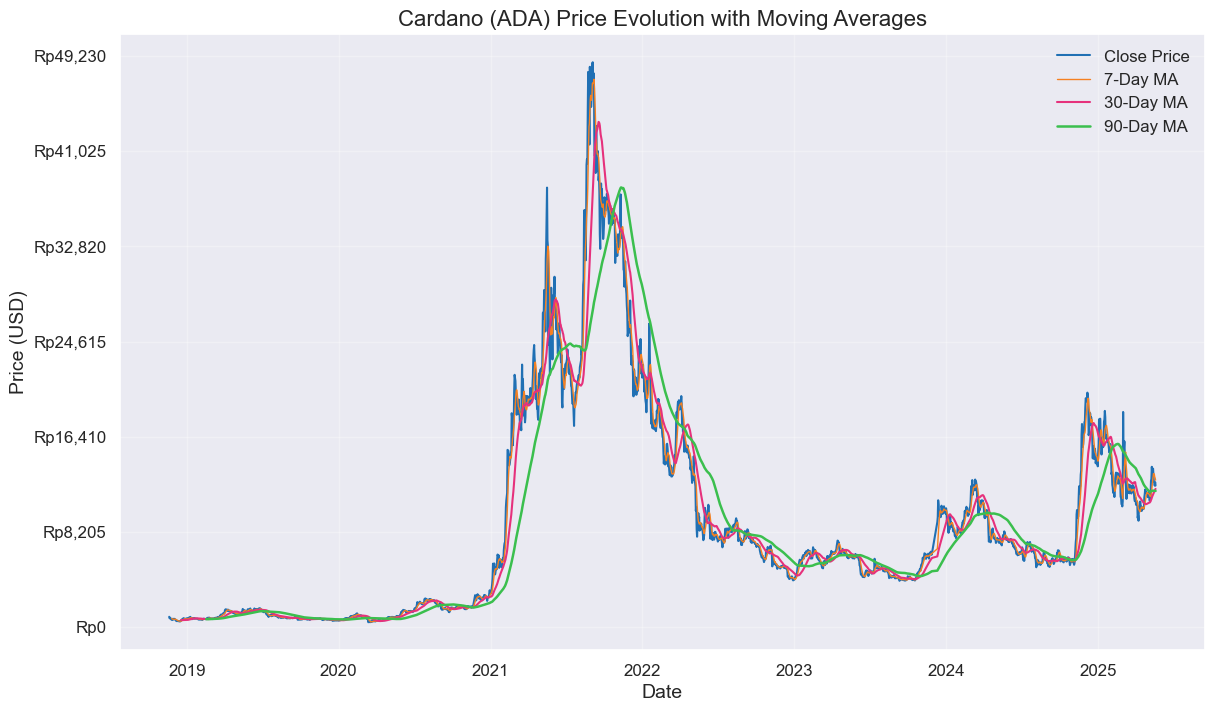

In [13]:
plt.figure(figsize=(14, 8))
plt.plot(df['dateOpen'], df['priceClose'], label='Close Price', color='#2070b4', linewidth=1.5)

# Add moving averages
df['MA_7'] = df['priceClose'].rolling(window=7).mean()
df['MA_30'] = df['priceClose'].rolling(window=30).mean()
df['MA_90'] = df['priceClose'].rolling(window=90).mean()

plt.plot(df['dateOpen'], df['MA_7'], label='7-Day MA', color='#f58021', linewidth=1)
plt.plot(df['dateOpen'], df['MA_30'], label='30-Day MA', color='#e6317c', linewidth=1.5)
plt.plot(df['dateOpen'], df['MA_90'], label='90-Day MA', color='#3bbf4e', linewidth=1.8)

plt.title('Cardano (ADA) Price Evolution with Moving Averages', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

# Conversion rate from USD to IDR (example rate, update as needed)
usd_to_idr = 16410  # (Updated 20 Mei 2025)

# Format y-axis to show Rupiah amounts
def rupiah_format(x, pos):
    # Convert to IDR then format
    x_idr = x * usd_to_idr
    return f'Rp{x_idr:,.0f}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(rupiah_format))
plt.show()

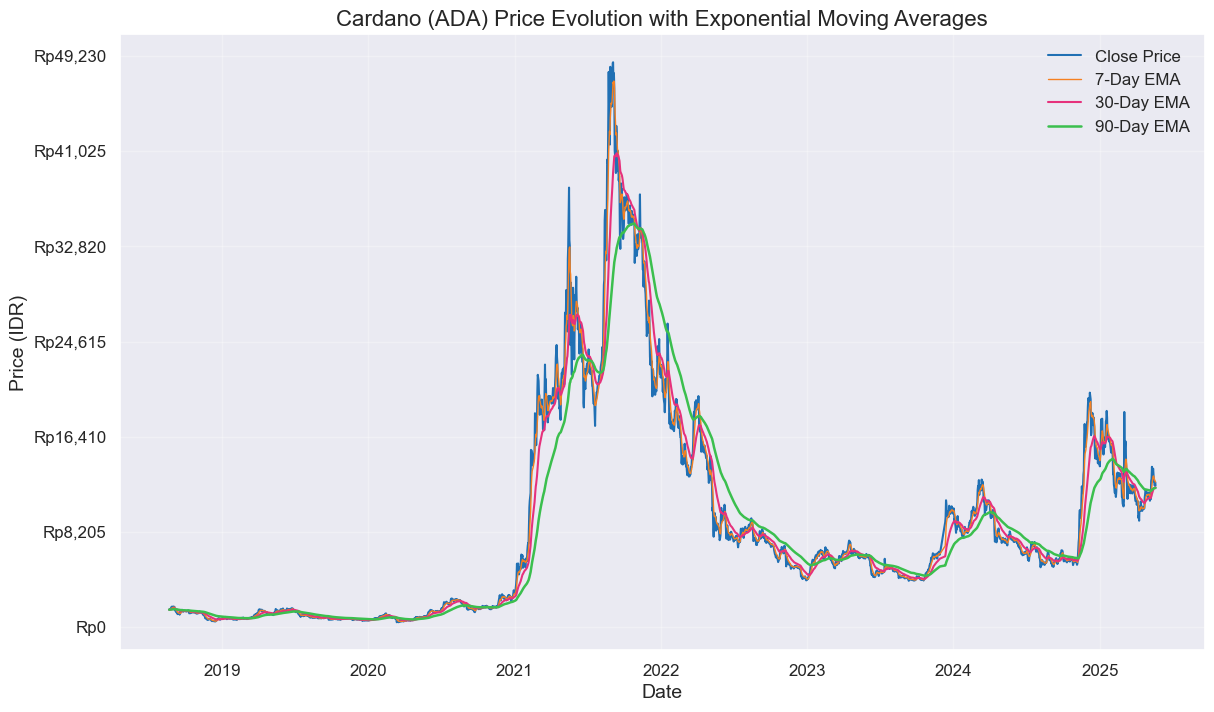

In [8]:
plt.figure(figsize=(14, 8))
plt.plot(df['dateOpen'], df['priceClose'], label='Close Price', color='#2070b4', linewidth=1.5)

# Add Exponential Moving Averages (EMA) (lebih responsif terhadap perubahan harga)
df['EMA_7'] = df['priceClose'].ewm(span=7, adjust=False).mean()
df['EMA_30'] = df['priceClose'].ewm(span=30, adjust=False).mean()
df['EMA_90'] = df['priceClose'].ewm(span=90, adjust=False).mean()

plt.plot(df['dateOpen'], df['EMA_7'], label='7-Day EMA', color='#f58021', linewidth=1)
plt.plot(df['dateOpen'], df['EMA_30'], label='30-Day EMA', color='#e6317c', linewidth=1.5)
plt.plot(df['dateOpen'], df['EMA_90'], label='90-Day EMA', color='#3bbf4e', linewidth=1.8)

plt.title('Cardano (ADA) Price Evolution with Exponential Moving Averages', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (IDR)', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

# Conversion rate from USD to IDR (example rate, update as needed)
usd_to_idr = 16410  # (Updated 20 Mei 2025)

# Format y-axis to show Rupiah amounts
def rupiah_format(x, pos):
    # Convert to IDR then format
    x_idr = x * usd_to_idr
    return f'Rp{x_idr:,.0f}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(rupiah_format))
plt.show()

#### DATA PREPARATION

In [14]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Split data into training (80%) and testing (20%) sets
train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# Feature engineering
# Lakukan feature engineering pada seluruh dataset (df telah di-load sebelumnya)
df['MA_7'] = df['priceClose'].rolling(window=7).mean()
df['MA_30'] = df['priceClose'].rolling(window=30).mean()
df['EMA_7'] = df['priceClose'].ewm(span=7, adjust=False).mean()
df['volatility'] = df['priceHigh'] - df['priceLow']
df['volume_change'] = df['volume'].pct_change()
df['price_change'] = df['priceClose'].pct_change()

# Scale the data for neural networks
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['priceClose'].values.reshape(-1, 1))

#### Prophet MODEL 

In [13]:
# pip install prophet


10:26:18 - cmdstanpy - INFO - Chain [1] start processing
10:26:19 - cmdstanpy - INFO - Chain [1] done processing


Prophet Model Results - MAE: 0.1700, RMSE: 0.2360, Accuracy: 71.89%


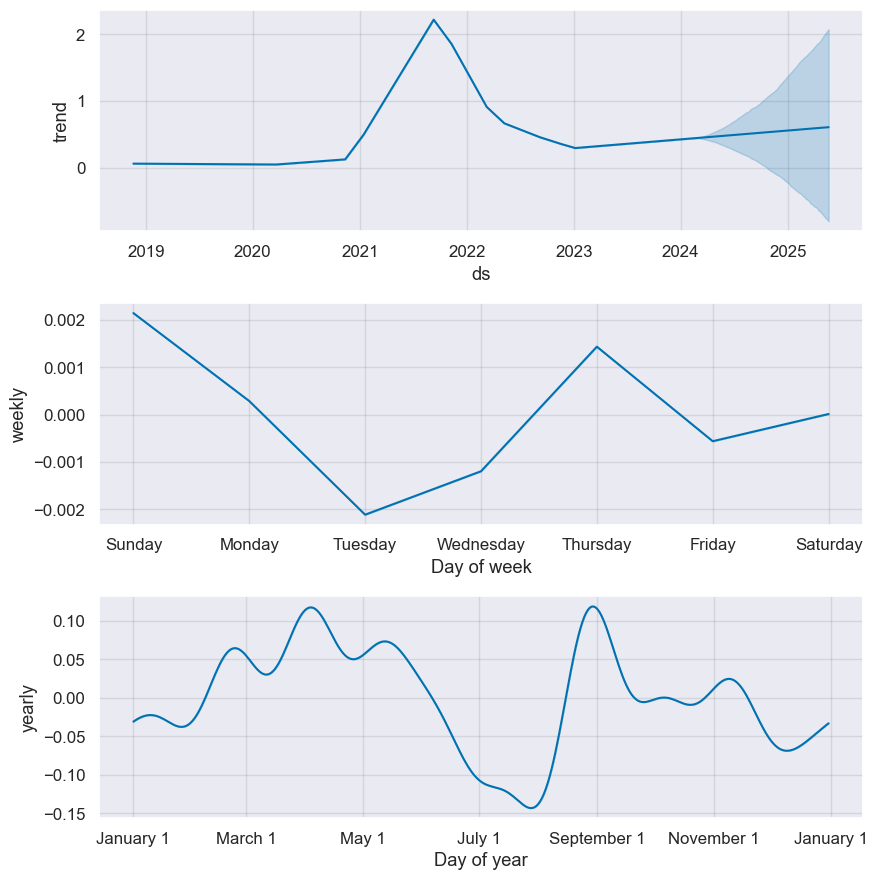

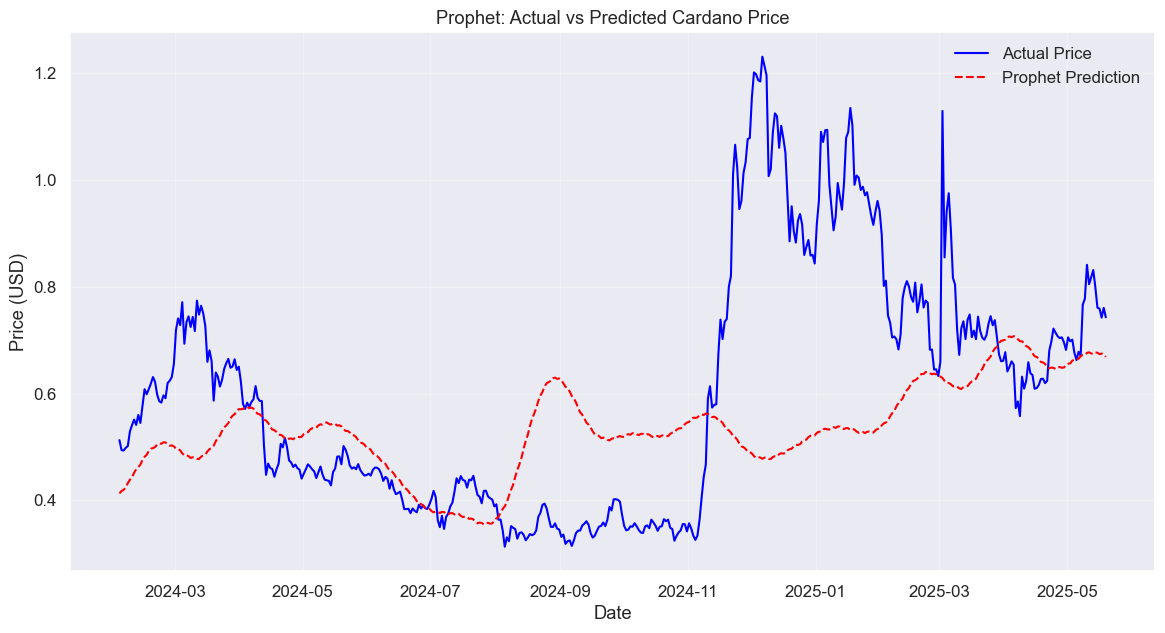

In [15]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Siapkan data Prophet (memerlukan kolom 'ds' dan 'y')
prophet_df = pd.DataFrame({
    'ds': df['dateOpen'],
    'y': df['priceClose']
})

# Split data menjadi training (80%) dan testing (20%)
train_size = int(len(prophet_df) * 0.8)
train_df = prophet_df.iloc[:train_size]
test_df = prophet_df.iloc[train_size:]

# Buat dan fit model Prophet
prophet_model = Prophet(
    daily_seasonality=False,
    weekly_seasonality=True,
    yearly_seasonality=True,
    changepoint_prior_scale=0.05,  # Kelenturan tren
    seasonality_prior_scale=10.0   # Kekuatan musiman
)
prophet_model.fit(train_df)

# Buat future dataframe untuk periode test
# Gunakan jumlah periode sama dengan jumlah baris pada test_df
future = prophet_model.make_future_dataframe(periods=len(test_df), freq='D')
forecast = prophet_model.predict(future)

# Ekstrak prediksi untuk periode test (ambil tail forecast)
prophet_preds = forecast.tail(len(test_df))['yhat'].values

# Evaluasi model Prophet
prophet_mae = mean_absolute_error(test_df['y'], prophet_preds)
prophet_rmse = np.sqrt(mean_squared_error(test_df['y'], prophet_preds))
accuracy = 100 - (prophet_mae / test_df['y'].mean() * 100)
print(f"Prophet Model Results - MAE: {prophet_mae:.4f}, RMSE: {prophet_rmse:.4f}, Accuracy: {accuracy:.2f}%")

# Plot komponen forecast (trend, musiman mingguan, dan musiman tahunan)
fig = prophet_model.plot_components(forecast)
plt.show()

# Plot perbandingan nilai aktual vs prediksi
# Gunakan kolom 'ds' dari test_df sebagai tanggal aktual
plt.figure(figsize=(14, 7))
plt.plot(test_df['ds'], test_df['y'], label='Actual Price', color='blue')
plt.plot(test_df['ds'], prophet_preds, label='Prophet Prediction', color='red', linestyle='--')
plt.title('Prophet: Actual vs Predicted Cardano Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

XGBoost Model Results - MAE: 0.0261, RMSE: 0.0465, Accuracy: 95.68%


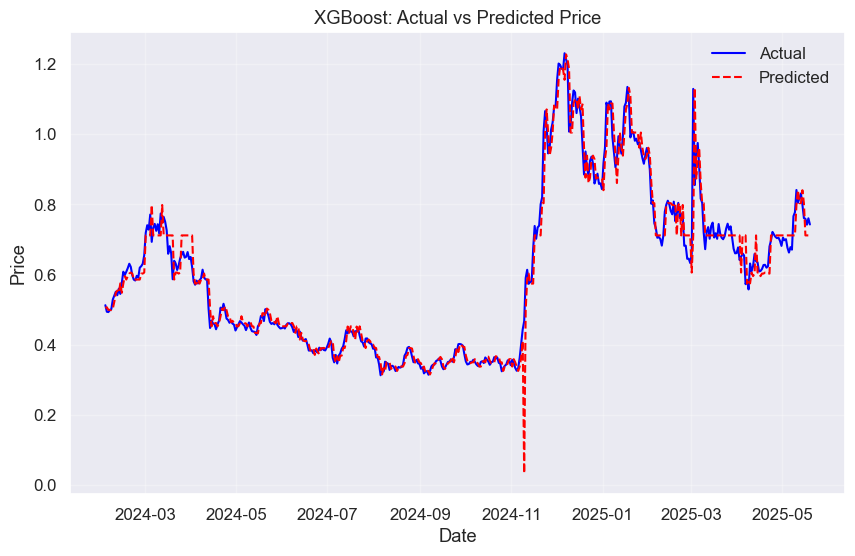

In [16]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

X_train = train_data[['priceOpen']]
y_train = train_data['priceClose']
X_test  = test_data[['priceOpen']]
y_test  = test_data['priceClose']

# Buat dan fit model XGBoost
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=500,
    learning_rate=0.01,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=False
)

# Forecast pada test set
xgb_preds = xgb_model.predict(X_test)

# Evaluasi model XGBoost
xgb_mae  = mean_absolute_error(y_test, xgb_preds)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))
accuracy = 100 - (xgb_mae / y_test.mean() * 100)
print(f"XGBoost Model Results - MAE: {xgb_mae:.4f}, RMSE: {xgb_rmse:.4f}, Accuracy: {accuracy:.2f}%")

# Plot perbandingan nilai aktual vs prediksi
plt.figure(figsize=(10,6))
plt.plot(test_data['dateOpen'], y_test, label='Actual', color='blue')
plt.plot(test_data['dateOpen'], xgb_preds, label='Predicted', color='red', linestyle='--')
plt.title("XGBoost: Actual vs Predicted Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler

# Data preparation
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Prepare data for LSTM
sequence_length = 60  # Use 60 days of historical data to predict the next day

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_price = scaler.fit_transform(df['priceClose'].values.reshape(-1, 1))

# Create sequences
X, y = create_sequences(scaled_price, sequence_length)

# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Buat LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=50, return_sequences=False))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units=1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train LSTM model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = lstm_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Make predictions
lstm_preds = lstm_model.predict(X_test)

# Inverse transform predictions and actual values
lstm_preds = scaler.inverse_transform(lstm_preds)
y_test_inv = scaler.inverse_transform(y_test)

# Evaluate LSTM model
lstm_mae = mean_absolute_error(y_test_inv, lstm_preds)
lstm_rmse = np.sqrt(mean_squared_error(y_test_inv, lstm_preds))

print(f"LSTM Model Results - MAE: {lstm_mae:.4f}, RMSE: {lstm_rmse:.4f}, Accuracy: {100 - (lstm_mae / y_test_inv.mean() * 100):.2f}%")

# Plot actual vs predicted values
test_dates = df['dateOpen'].iloc[train_size + sequence_length:train_size + sequence_length + len(y_test)]

Epoch 1/100


c:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0269

46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0265 - val_loss: 2.5317e-04
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0030 - val_loss: 2.8962e-04
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0024 - val_loss: 3.7599e-04
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0028 - val_loss: 2.9320e-04
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0023 - val_loss: 2.5958e-04
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0020

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0020 - val_loss: 1.5002e-04
Epoch 7/100
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0016

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0016 - val_loss: 1.1194e-04
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0015 - val_loss: 1.6788e-04
Epoch 9/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0016 - val_loss: 1.6525e-04
Epoch 10/100
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0022

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0021 - val_loss: 1.1059e-04
Epoch 11/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0016 - val_loss: 1.2189e-04
Epoch 12/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0017 - val_loss: 4.9409e-04
Epoch 13/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0015 - val_loss: 1.3301e-04
Epoch 14/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0015 - val_loss: 1.1331e-04
Epoch 15/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0013

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0013 - val_loss: 9.6907e-05
Epoch 16/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0013 - val_loss: 1.0237e-04
Epoch 17/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0015 - val_loss: 1.4997e-04
Epoch 18/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0016

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0016 - val_loss: 9.1429e-05
Epoch 19/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0015

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0015 - val_loss: 9.0557e-05
Epoch 20/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0015 - val_loss: 1.0015e-04
Epoch 21/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0012 - val_loss: 9.0821e-05
Epoch 22/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0012

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0012 - val_loss: 8.7031e-05
Epoch 23/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0011 - val_loss: 3.1270e-04
Epoch 24/100
44/46 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0012

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0012 - val_loss: 8.4731e-05
Epoch 25/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0013 - val_loss: 1.8455e-04
Epoch 26/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0012 - val_loss: 2.0490e-04
Epoch 27/100
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0011

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0011 - val_loss: 8.1938e-05
Epoch 28/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0010 - val_loss: 1.1680e-04
Epoch 29/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0012

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0012 - val_loss: 7.9181e-05
Epoch 30/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0012 - val_loss: 9.9160e-05
Epoch 31/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0013 - val_loss: 8.9295e-05
Epoch 32/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0013

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0013 - val_loss: 7.6610e-05
Epoch 33/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0012 - val_loss: 8.7151e-05
Epoch 34/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0011 - val_loss: 8.4354e-05
Epoch 35/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0012 - val_loss: 1.4018e-04
Epoch 36/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0011 - val_loss: 7.8022e-05
Epoch 37/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 9.2444e-04 - val_loss: 1.0394e-04
Epoch 38/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0012 - val_loss: 1.7259e-04
Epoch 39/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0011 - val_loss: 1.0077e-04
Epoch 40/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 9.5127e-04

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 9.5274e-04 - val_loss: 7.2542e-05
Epoch 41/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 9.6262e-04 - val_loss: 1.0615e-04
Epoch 42/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0012 - val_loss: 7.5291e-05
Epoch 43/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 9.2648e-04 - val_loss: 7.2952e-05
Epoch 44/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 8.5043e-04 - val_loss: 7.3224e-05
Epoch 45/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0010

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0010 - val_loss: 6.9432e-05
Epoch 46/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0010

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0010 - val_loss: 6.7264e-05
Epoch 47/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0010 - val_loss: 8.7874e-05
Epoch 48/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 8.1705e-04 - val_loss: 8.0603e-05
Epoch 49/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 8.8560e-04

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 8.8997e-04 - val_loss: 6.5059e-05
Epoch 50/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 9.9251e-04 - val_loss: 7.6194e-05
Epoch 51/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 8.8923e-04 - val_loss: 6.6777e-05
Epoch 52/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 8.3762e-04 - val_loss: 1.0242e-04
Epoch 53/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 7.9474e-04 - val_loss: 6.9391e-05
Epoch 54/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0011

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0011 - val_loss: 6.1610e-05
Epoch 55/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0010 - val_loss: 3.3373e-04
Epoch 56/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0012 - val_loss: 6.3079e-05
Epoch 57/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 8.7159e-04 - val_loss: 6.8717e-05
Epoch 58/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0010 - val_loss: 6.6100e-05
Epoch 59/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 8.1347e-04

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 8.1554e-04 - val_loss: 5.9505e-05
Epoch 60/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.7896e-04

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 8.7953e-04 - val_loss: 5.8359e-05
Epoch 61/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 8.3486e-04 - val_loss: 6.6691e-05
Epoch 62/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 9.9949e-04 - val_loss: 8.1744e-05
Epoch 63/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.2281e-04

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 8.2552e-04 - val_loss: 5.7200e-05
Epoch 64/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 7.9842e-04 - val_loss: 6.5979e-05
Epoch 65/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0011 - val_loss: 5.7600e-05
Epoch 66/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 7.6998e-04 - val_loss: 1.2668e-04
Epoch 67/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 9.2828e-04

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 9.2940e-04 - val_loss: 5.5310e-05
Epoch 68/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 9.2264e-04 - val_loss: 6.6719e-05
Epoch 69/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 7.9704e-04 - val_loss: 8.7715e-05
Epoch 70/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0010

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0010 - val_loss: 5.4121e-05
Epoch 71/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 9.5834e-04 - val_loss: 5.6213e-05
Epoch 72/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 8.4777e-04 - val_loss: 5.6474e-05
Epoch 73/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 9.2952e-04 - val_loss: 5.8607e-05
Epoch 74/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0010 - val_loss: 8.2473e-05
Epoch 75/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0010 - val_loss: 9.8808e-05
Epoch 76/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0011 - val_loss: 6.9723e-05
Epoch 77/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 9.2549e-04 - val_loss: 6.0785e-05
Epoch 78/100
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 7.2338e-04

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 7.2649e-04 - val_loss: 5.2396e-05
Epoch 79/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 7.6525e-04 - val_loss: 9.0496e-05
Epoch 80/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 8.2395e-04

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 8.2306e-04 - val_loss: 4.9970e-05
Epoch 81/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 8.9605e-04 - val_loss: 5.8638e-05
Epoch 82/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0012 - val_loss: 5.6211e-05
Epoch 83/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 8.2932e-04

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 8.2914e-04 - val_loss: 4.8868e-05
Epoch 84/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 7.7708e-04 - val_loss: 5.4922e-05
Epoch 85/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 8.0380e-04 - val_loss: 4.9367e-05
Epoch 86/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 8.4928e-04 - val_loss: 5.0686e-05
Epoch 87/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 8.5422e-04 - val_loss: 5.3613e-05
Epoch 88/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 8.1102e-04 - val_loss: 6.3448e-05
Epoch 89/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 7.1757e-04

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 7.1815e-04 - val_loss: 4.6863e-05
Epoch 90/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 7.0014e-04 - val_loss: 8.6620e-05
Epoch 91/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 8.3990e-04 - val_loss: 5.3290e-05
Epoch 92/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 8.6194e-04 - val_loss: 6.8635e-05
Epoch 93/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 9.9954e-04 - val_loss: 4.8207e-05
Epoch 94/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 6.8066e-04

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.8159e-04 - val_loss: 4.5457e-05
Epoch 95/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 7.0971e-04 - val_loss: 5.4263e-05
Epoch 96/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 8.8490e-04 - val_loss: 4.5875e-05
Epoch 97/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 9.4516e-04 - val_loss: 1.2739e-04
Epoch 98/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 8.7512e-04 - val_loss: 6.0997e-05
Epoch 99/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.8394e-04 - val_loss: 8.2164e-05
Epoch 100/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 7.5894e-04

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 7.6119e-04 - val_loss: 4.3509e-05
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
LSTM Model Results - MAE: 0.0255, RMSE: 0.0443, Accuracy: 95.80%


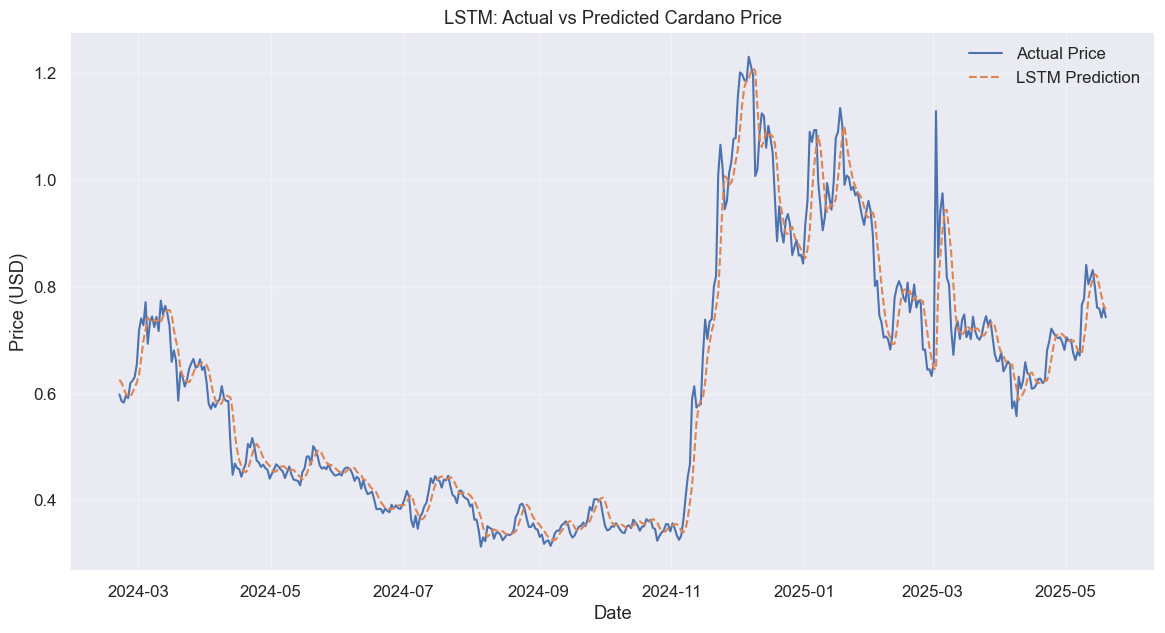

In [19]:
plt.figure(figsize=(14, 7))
plt.plot(test_dates, y_test_inv, label='Actual Price')
plt.plot(test_dates, lstm_preds, label='LSTM Prediction', linestyle='--')
plt.title('LSTM: Actual vs Predicted Cardano Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()